In [1]:
import numpy as np
img=np.load("CK+dataset.npy")
label=np.load("CK+label.npy")

In [2]:
h,w=img[0].shape[:2]

In [3]:
h,w

(640, 480)

In [4]:
import cv2

In [5]:
def rotate_face_dataset(list_img,label):
    h,w=list_img[0].shape[:2]
    make_new_dataset=[]
    make_new_label=[]
    for i in range(len(list_img)):
        wimg=list_img[i]
        rotate_rvs_45=cv2.getRotationMatrix2D((w/2,h/2),-45,1)
        rotate_rvs_45_img=cv2.warpAffine(wimg,rotate_rvs_45,(w,h))

        rotate_rvs_30=cv2.getRotationMatrix2D((w/2,h/2),-30,1)
        rotate_rvs_30_img=cv2.warpAffine(wimg,rotate_rvs_30,(w,h))

        rotate_rvs_15=cv2.getRotationMatrix2D((w/2,h/2),-15,1)
        rotate_rvs_15_img=cv2.warpAffine(wimg,rotate_rvs_15,(w,h))
        
        rotate=cv2.getRotationMatrix2D((w/2,h/2),0,1)
        rotate_img=cv2.warpAffine(wimg,rotate,(w,h))

        rotate_15=cv2.getRotationMatrix2D((w/2,h/2),15,1)
        rotate_15_img=cv2.warpAffine(wimg,rotate_15,(w,h))

        rotate_30=cv2.getRotationMatrix2D((w/2,h/2),30,1)
        rotate_30_img=cv2.warpAffine(wimg,rotate_30,(w,h))

        rotate_45=cv2.getRotationMatrix2D((w/2,h/2),45,1)
        rotate_45_img=cv2.warpAffine(wimg,rotate_45,(w,h))
        
        make_new_dataset.append(rotate_rvs_45_img)        
        make_new_dataset.append(rotate_rvs_30_img)        
        make_new_dataset.append(rotate_rvs_15_img)        
        make_new_dataset.append(rotate_img)        
        make_new_dataset.append(rotate_15_img)        
        make_new_dataset.append(rotate_30_img)        
        make_new_dataset.append(rotate_45_img)
        for j in range(7):
            make_new_label.append(label[i])
    return make_new_dataset, make_new_label

In [6]:
new_img,new_label=rotate_face_dataset(img,label)

In [8]:
len(new_img), len(new_label)

(2289, 2289)

In [9]:
new_img=np.array(new_img)
new_label=np.array(new_label)

In [16]:
import matplotlib.pyplot as plt
def Visualization(input_data,label,index):
    Visual_image=input_data[index]
    Visual_label=label[index]
    plt.imshow(Visual_image)
    if Visual_label==1:
        title_n="anger"
    elif Visual_label==2:
        title_n="contemp"
    elif Visual_label==3:
        title_n="disgust"
    elif Visual_label==4:
        title_n="fear"
    elif Visual_label==5:
        title_n="happy"
    elif Visual_label==6:
        title_n="sad"
    elif Visual_label==7:
        title_n="Perhaps_surprise"
    plt.title(title_n)

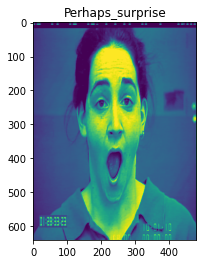

In [18]:
Visualization(new_img,new_label,654)

In [19]:
np.save("CK+_new_dataset.npy",new_img)
np.save("CK+_new_label.npy",new_label)